In [28]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score

### 2)a. Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [29]:
df=pd.read_csv('C:\\Users\\milon\\Desktop\\bank.csv')

In [30]:
#df

In [31]:
test=df.sample(472)
train=df.sample(900)

In [32]:
y_test=test.iloc[:,-1:]
x_test=test.iloc[:,:-1]
y_train=train.iloc[:,-1:]
x_train=train.iloc[:,:-1]
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

### 2)b.i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.2 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points.Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10,20, 30, ... , 900 data points and their 90 test errors.
## Passive Learning.

In [33]:
avg1=pd.DataFrame()

for x in range(0,50):
    acs=[]
    x_tr=pd.DataFrame()
    y_tr=pd.DataFrame()
    skf=StratifiedKFold(n_splits=90)
    cv=5
    for train_index, tr_index_10 in skf.split(x_train, y_train):
            #print(type(x_tr))
            x_tr=pd.concat([x_tr,x_train.iloc[tr_index_10,:]])
            #print(x_tr)
            y_tr=pd.concat([y_tr,y_train.iloc[tr_index_10]])
            #print(y_tr)
            parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]} ]
            model = GridSearchCV(svm.LinearSVC(penalty='l1',dual=False),parameters,cv=cv)
            cv=10
            model.fit(x_tr, y_tr.values.ravel())
    
            #calculating train parameters
            pred_y = model.predict(x_test)
            accu=1-(accuracy_score(y_test, pred_y))    #computing the error
            acs.append(accu) 
    aa1=pd.Series(acs)
    avg1.insert(loc=x,column=x,value=aa1)
            


In [45]:
avg_50=avg1.mean(axis=1)
#print(avg_50)

### 2)b.ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM4 and add them to the pool. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
## Active learning.

In [42]:
df=pd.read_csv('C:\\Users\\milon\\Desktop\\bank.csv')
test=df.sample(472)
train=df.sample(900)
avg=pd.DataFrame()

for x in range(0,50):
    y_test=test.iloc[:,-1:]
    x_test=test.iloc[:,:-1]
    y_train=train.iloc[:,-1:]
    x_train=train.iloc[:,:-1]
    x_train=x_train.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    x_test=x_test.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    acs1=[]
    x_tr=pd.DataFrame()
    y_tr=pd.DataFrame()
    
    skf=StratifiedKFold(n_splits=90)
    cv=5
    for train_index, tr_index_10 in skf.split(x_train, y_train):
        #print(tr_index_10)
        x_tr=x_train.iloc[tr_index_10,:]
        y_tr=y_train.loc[tr_index_10]
        break
        
    for i in range(0,90):
        
        x_test=x_test.reset_index(drop=True)
        y_test=y_test.reset_index(drop=True)
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]} ]
        model = GridSearchCV(svm.LinearSVC(penalty='l1',dual=False),parameters,cv=cv)
        cv=10
        model.fit(x_tr, y_tr)           
        #indexes=list(pd.DataFrame(model.decision_function(x_train)).sort_values([0]).index)
        
        x_train=x_train.reset_index(drop=True)
        y_train=y_train.reset_index(drop=True)

        ind=model.decision_function(x_train)
        ind_df=pd.DataFrame(ind)
        #print(x_tr)
        
        s=ind_df.sort_values(0)
        s=s.iloc[0:10,:]
        s_index=s.index
        
        #print(s_index)
        xtemp=x_train.iloc[s_index,:]
        ytemp=y_train.iloc[s_index,:]
        
        x_train=x_train.drop(index=s_index)
        y_train=y_train.drop(index=s_index)
        
        pred_y = model.predict(x_test)
        a=1-(accuracy_score(y_test, pred_y)) #computing the error
        acs1.append(a)
        
        x_tr=pd.concat([x_tr,xtemp],axis=0)
        y_tr=pd.concat([y_tr,ytemp],axis=0)
  
    avg=pd.concat([avg,pd.DataFrame(acs1)],axis=1)       
        
        

In [43]:
avg_50=avg.mean(axis=1)

### 2)c. Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

Text(0,0.5,'Average Test Error')

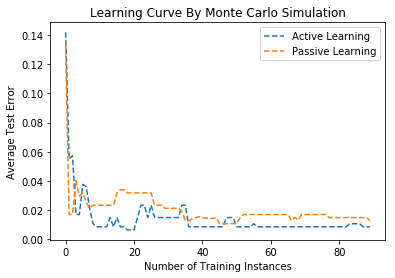

In [56]:
p = pd.DataFrame({'Active Learning':avg1_50, 'Passive Learning':avg_50})
a=p.plot(style='--',title='Learning Curve By Monte Carlo Simulation')
a.set_xlabel("Number of Training Instances")
a.set_ylabel("Average Test Error")

Conclusion <br>
We can see that active learning has a lesser average test error rate than passive learning.
